In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [3]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
tf.test.is_built_with_cuda()

True

In [5]:
#we are using ann for image classification
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.cifar10.load_data()

In [6]:
X_train.shape#50000 sample 32,32 dimension and 3 is rgb red, green,blue

(50000, 32, 32, 3)

In [7]:
y_train.shape

(50000, 1)

In [8]:
X_train[0].shape

(32, 32, 3)

In [9]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [10]:
def plot_sample(index):
  plt.figure(figsize=(10,1))
  plt.imshow(X_train[index])


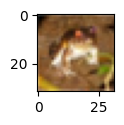

In [11]:
plot_sample(0)

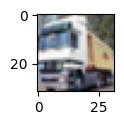

In [12]:
plot_sample(1)

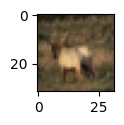

In [13]:
plot_sample(3)

In [14]:
y_train[3]

array([4], dtype=uint8)

In [15]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [16]:
X_train_scaled.shape

(50000, 32, 32, 3)

In [17]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [18]:
y_train_categorical=keras.utils.to_categorical(#it is keras api that do onehot enoding
    y_train,num_classes=10,dtype='float32'
)
y_train_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [19]:
y_test_categorical=keras.utils.to_categorical(
    y_test,num_classes=10,dtype='float32'
)
y_test_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [20]:
X_train.shape

(50000, 32, 32, 3)

In [21]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
#whenever you have output as onehot encoded use loss=categorical_entropy
model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train_scaled,y_train_categorical,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 9s 4ms/step - loss: 1.8092 - accuracy: 0.3531
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6211 - accuracy: 0.4289
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5385 - accuracy: 0.4576
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4766 - accuracy: 0.4771
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4288 - accuracy: 0.4955
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3861 - accuracy: 0.5113
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3495 - accuracy: 0.5252
Epoch 8/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3163 - accuracy: 0.5398
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2851 - accuracy: 0.5486
Epoch 10/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.252

In [22]:
np.argmax(model.predict(X_test_scaled)[1])

313/313 [==============================] - 1s 2ms/step


1

In [23]:
model.evaluate(X_test_scaled,y_test_categorical)

313/313 [==============================] - 1s 3ms/step - loss: 1.3922 - accuracy: 0.5054


[1.3922460079193115, 0.5054000020027161]

In [24]:
def get_model():
  model=keras.Sequential([
      keras.layers.Flatten(input_shape=(32,32,3)),
      keras.layers.Dense(3000,activation='relu'),
      keras.layers.Dense(1000,activation='relu'),
      keras.layers.Dense(10,activation='sigmoid')
  ])
  model.compile(optimizer='SGD',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [25]:
#used cpu
with tf.device('/CPU:0'):
  cpu_model=get_model()
  cpu_model.fit(X_train_scaled,y_train_categorical,epochs=1)

1563/1563 [==============================] - 126s 80ms/step - loss: 1.8124 - accuracy: 0.3538
